In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('Train.csv')
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,350957,Male,50,1,41,0,1-2 Year,Yes,35915,124,240,0
1,239788,Female,48,1,28,0,1-2 Year,Yes,26873,124,274,0
2,348272,Female,34,1,41,0,1-2 Year,Yes,2630,156,138,1
3,73940,Female,43,1,28,0,1-2 Year,Yes,46877,124,223,0
4,292871,Male,29,1,28,1,< 1 Year,No,38009,152,106,0


In [3]:
train.shape

(304887, 12)

In [8]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [7]:
train.duplicated().sum()

0

In [10]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000
mean,190464.686973,38.832545,0.997875,26.381348,0.458435,30567.921318,112.021946,154.293105,0.122357
std,109998.823015,15.520667,0.046053,13.235034,0.498270,17255.545191,54.212188,83.713258,0.327698
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95183.500000,25.000000,1.000000,15.000000,0.000000,24409.000000,29.000000,82.000000,0.000000
50%,190485.000000,36.000000,1.000000,28.000000,0.000000,31673.000000,133.000000,154.000000,0.000000
75%,285642.500000,49.000000,1.000000,35.000000,1.000000,39393.000000,152.000000,227.000000,0.000000
max,381108.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
test = pd.read_csv('Test.csv')
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,291378,Male,31,1,18,0,1-2 Year,Yes,2630,156,152
1,154746,Female,24,1,15,1,< 1 Year,No,28105,152,267
2,218512,Female,25,1,14,1,< 1 Year,No,29302,152,139
3,173930,Male,49,1,28,0,1-2 Year,Yes,28357,26,12
4,241471,Male,55,1,45,0,1-2 Year,Yes,33288,26,44


In [6]:
test.shape

(76222, 11)

In [9]:
test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [12]:
train['Vehicle_Damage'] = train['Vehicle_Damage'].replace({'Yes':1, 'No':0})
test['Vehicle_Damage'] = test['Vehicle_Damage'].replace({'Yes':1, 'No':0})

In [13]:
test['Vehicle_Damage'] = test['Vehicle_Damage'].astype(int)
train['Vehicle_Damage'] = train['Vehicle_Damage'].astype(int)

In [14]:
train['Vehicle_Age'].value_counts()

1-2 Year     160244
< 1 Year     131823
> 2 Years     12820
Name: Vehicle_Age, dtype: int64

In [15]:
train['Vehicle_Age'] = train['Vehicle_Age'].replace({'1-2 Year':1, '< 1 Year': 0, '> 2 Years': 2})
train['Vehicle_Age'] = train['Vehicle_Age'].astype(int)

In [16]:
test['Vehicle_Age'] = test['Vehicle_Age'].replace({'1-2 Year':1, '< 1 Year': 0, '> 2 Years': 2})
test['Vehicle_Age'] = test['Vehicle_Age'].astype(int)

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Gender'] = le.fit_transform(train['Gender'])
test['Gender'] = le.fit_transform(test['Gender'])

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304887 entries, 0 to 304886
Data columns (total 12 columns):
id                      304887 non-null int64
Gender                  304887 non-null int32
Age                     304887 non-null int64
Driving_License         304887 non-null int64
Region_Code             304887 non-null int64
Previously_Insured      304887 non-null int64
Vehicle_Age             304887 non-null int32
Vehicle_Damage          304887 non-null int32
Annual_Premium          304887 non-null int64
Policy_Sales_Channel    304887 non-null int64
Vintage                 304887 non-null int64
Response                304887 non-null int64
dtypes: int32(3), int64(9)
memory usage: 24.4 MB


In [55]:
x = train.drop(['Response', 'id'], axis = 1)
y = train['Response']

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [29]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
y_pred = lor.fit(x_train, y_train).predict(x_test)

C:\Users\Akshay\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
print(accuracy_score(y_test, y_pred))

0.8774476040539211


In [36]:
newtrain = train.drop('id',axis = 1)
newtest = test.drop('id',axis = 1)

In [49]:
x_train = newtrain.drop('Response', axis = 1)
y_train = newtrain['Response']
x_test = newtest

In [38]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
y_pred = lor.fit(x_train, y_train).predict(x_test)

C:\Users\Akshay\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [39]:
solution = pd.DataFrame({'id': test.id, 'Response': y_pred})
solution.to_csv('LOR.csv', index = False)

In [48]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
y_pred = lgbm.fit(x_train, y_train).predict(x_test)
print(accuracy_score(y_test, y_pred))

0.8775623995539374


In [50]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
y_pred = lgbm.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'id': test.id, 'Response': y_pred})
solution.to_csv('LGBM.csv', index = False)

In [52]:
from sklearn.ensemble import AdaBoostClassifier
adab = AdaBoostClassifier()
y_pred = adab.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'id': test.id, 'Response': y_pred})
solution.to_csv('ADAB.csv', index = False)

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
gab = GradientBoostingClassifier()
y_pred = gab.fit(x_train, y_train).predict(x_test)
print(accuracy_score(y_test, y_pred))

0.8773656072681951


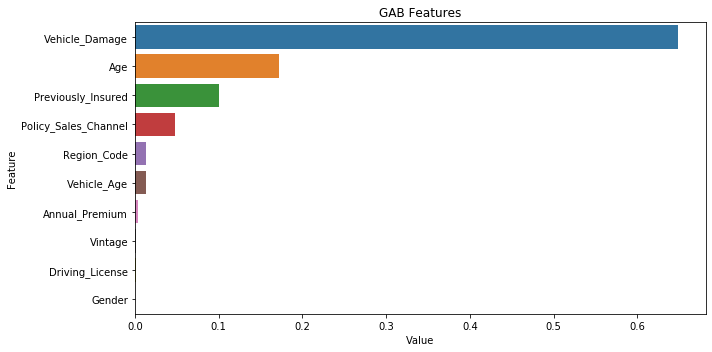

In [58]:
feature_imp = pd.DataFrame(sorted(zip(gab.feature_importances_, x.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(10,5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('GAB Features')
plt.tight_layout()
plt.show()

In [62]:
x_train = newtrain.drop(['Response', 'Gender', 'Driving_License', 'Vintage'], axis = 1)
y_train = newtrain['Response']
x_test = newtest.drop(['Gender', 'Driving_License', 'Vintage'], axis = 1)
from sklearn.ensemble import GradientBoostingClassifier
gab = GradientBoostingClassifier()
y_pred = gab.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'id': test.id, 'Response': y_pred})
solution.to_csv('Solution.csv', index = False)